In [102]:
import numpy as np 
import pandas as pd 
import os
import string
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [72]:
image_MoA = pd.read_csv('/Users/emilylorenzen/GitStuff/metis-engineering/image_MoA.csv')

/Applications/anaconda3/envs/engineering/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### Determine which mechanisms of action are most represented

The top MoAs are growth factor, interleukin, GPCR agonist, immunoglobulin, and virulence factor. 

In [73]:
# Save the MoAs in a list so that the most represented are first
ordered_MoA = image_MoA.mechanism.value_counts().keys().tolist()

In [74]:
MoA_metadata

,Unnamed: 0,site_id,well_id,cell_type,experiment,plate,well,site,treatment,treatment_conc,mechanism,Unnamed: 2,Unnamed: 3
576,576,HUVEC-1_1_AA05_1,HUVEC-1_1_AA05,HUVEC,HUVEC-1,1,AA05,1,CCL14a,0.100000,GPCR agonist,NaN,NaN
577,577,HUVEC-1_1_AA05_2,HUVEC-1_1_AA05,HUVEC,HUVEC-1,1,AA05,2,CCL14a,0.100000,GPCR agonist,NaN,NaN
578,578,HUVEC-1_1_AA05_3,HUVEC-1_1_AA05,HUVEC,HUVEC-1,1,AA05,3,CCL14a,0.100000,GPCR agonist,NaN,NaN
579,579,HUVEC-1_1_AA05_4,HUVEC-1_1_AA05,HUVEC,HUVEC-1,1,AA05,4,CCL14a,0.100000,GPCR agonist,NaN,NaN
580,580,HUVEC-1_1_O39_1,HUVEC-1_1_O39,HUVEC,HUVEC-1,1,O39,1,CCL14a,0.100000,GPCR agonist,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
130035,130035,HUVEC-2_12_O43_4,HUVEC-2_12_O43,HUVEC,HUVEC-2,12,O43,4,GCP-2,0.000001,GPCR agonist,NaN,NaN
130036,130036,HUVEC-2_12_Q10_1,HUVEC-2_12_Q10,HUVEC,HUVEC-2,12,Q10,1,GCP-2,0.000001,GPCR agonist,NaN,NaN
130037,130037,HUVEC-2_12_Q10_2,HUVEC-2_12_Q10,HUVEC,HUVEC-2,12,Q10,2,GCP-2,0.000001,GPCR agonist,NaN,NaN
130038,130038,HUVEC-2_12_Q10_3,HUVEC-2_12_Q10,HUVEC,HUVEC-2,12,Q10,3,GCP-2,0.000001,GPCR agonist,NaN,NaN


In [130]:
def get_paths(MoA, channel):

    base_dir = '/Users/emilylorenzen/Downloads/rxrx2-2/images/'
    # for MoA in ordered_MoA[0:6]:
    MoA_metadata = image_MoA[image_MoA.mechanism == MoA]

    all_image_paths = []
    for index, row in MoA_metadata.iterrows():   
         image_path = str(base_dir + row.experiment + '/Plate' + str(row.plate) + '/' + row.well + '_s' + str(row.site) + '_w' + str(1) + '.png')
         all_image_paths.append(image_path)
    return all_image_paths

In [131]:
GPCR_1_paths = get_paths('GPCR agonist', 1)
GPCR_2_paths = get_paths('GPCR agonist', 2)
GPCR_3_paths = get_paths('GPCR agonist', 3)
GPCR_4_paths = get_paths('GPCR agonist', 4)
GPCR_5_paths = get_paths('GPCR agonist', 5)
GPCR_6_paths = get_paths('GPCR agonist', 6)

In [132]:
GF_1_paths = get_paths('Growth factor', 1)
GF_2_paths = get_paths('Growth factor', 2)
GF_3_paths = get_paths('Growth factor', 3)
GF_4_paths = get_paths('Growth factor', 4)
GF_5_paths = get_paths('Growth factor', 5)
GF_6_paths = get_paths('Growth factor', 6)

In [133]:
IL_1_paths = get_paths('Interleukin', 1)
IL_2_paths = get_paths('Interleukin', 2)
IL_3_paths = get_paths('Interleukin', 3)
IL_4_paths = get_paths('Interleukin', 4)
IL_5_paths = get_paths('Interleukin', 5)
IL_6_paths = get_paths('Interleukin', 6)

In [134]:
from keras.preprocessing import image

def process_images(all_image_paths):
    final_array = np.empty((0, 256, 256, 1))
    for path_ in all_image_paths:
#         print(path_)
        img_ = image.load_img(path_, color_mode = 'grayscale', target_size = (256, 256))
        img_array = image.img_to_array(img_)
        img_array = np.expand_dims(img_array, axis=0)
#         print(img_array.shape)
        print(final_array.shape)
        final_array = np.append(final_array, img_array, axis = 0)
    return final_array

In [135]:
len(GPCR_1_array)

1000

In [136]:
GPCR_1_array = process_images(GPCR_1_paths[0:1000])

(0, 256, 256, 1)
(1, 256, 256, 1)
(2, 256, 256, 1)
(3, 256, 256, 1)
(4, 256, 256, 1)
(5, 256, 256, 1)
(6, 256, 256, 1)
(7, 256, 256, 1)
(8, 256, 256, 1)
(9, 256, 256, 1)
(10, 256, 256, 1)
(11, 256, 256, 1)
(12, 256, 256, 1)
(13, 256, 256, 1)
(14, 256, 256, 1)
(15, 256, 256, 1)
(16, 256, 256, 1)
(17, 256, 256, 1)
(18, 256, 256, 1)
(19, 256, 256, 1)
(20, 256, 256, 1)
(21, 256, 256, 1)
(22, 256, 256, 1)
(23, 256, 256, 1)
(24, 256, 256, 1)
(25, 256, 256, 1)
(26, 256, 256, 1)
(27, 256, 256, 1)
(28, 256, 256, 1)
(29, 256, 256, 1)
(30, 256, 256, 1)
(31, 256, 256, 1)
(32, 256, 256, 1)
(33, 256, 256, 1)
(34, 256, 256, 1)
(35, 256, 256, 1)
(36, 256, 256, 1)
(37, 256, 256, 1)
(38, 256, 256, 1)
(39, 256, 256, 1)
(40, 256, 256, 1)
(41, 256, 256, 1)
(42, 256, 256, 1)
(43, 256, 256, 1)
(44, 256, 256, 1)
(45, 256, 256, 1)
(46, 256, 256, 1)
(47, 256, 256, 1)
(48, 256, 256, 1)
(49, 256, 256, 1)
(50, 256, 256, 1)
(51, 256, 256, 1)
(52, 256, 256, 1)
(53, 256, 256, 1)
(54, 256, 256, 1)
(55, 256, 256, 1)
(5

In [137]:
GF_1_array = process_images(GF_1_paths[0:1000])

(0, 256, 256, 1)
(1, 256, 256, 1)
(2, 256, 256, 1)
(3, 256, 256, 1)
(4, 256, 256, 1)
(5, 256, 256, 1)
(6, 256, 256, 1)
(7, 256, 256, 1)
(8, 256, 256, 1)
(9, 256, 256, 1)
(10, 256, 256, 1)
(11, 256, 256, 1)
(12, 256, 256, 1)
(13, 256, 256, 1)
(14, 256, 256, 1)
(15, 256, 256, 1)
(16, 256, 256, 1)
(17, 256, 256, 1)
(18, 256, 256, 1)
(19, 256, 256, 1)
(20, 256, 256, 1)
(21, 256, 256, 1)
(22, 256, 256, 1)
(23, 256, 256, 1)
(24, 256, 256, 1)
(25, 256, 256, 1)
(26, 256, 256, 1)
(27, 256, 256, 1)
(28, 256, 256, 1)
(29, 256, 256, 1)
(30, 256, 256, 1)
(31, 256, 256, 1)
(32, 256, 256, 1)
(33, 256, 256, 1)
(34, 256, 256, 1)
(35, 256, 256, 1)
(36, 256, 256, 1)
(37, 256, 256, 1)
(38, 256, 256, 1)
(39, 256, 256, 1)
(40, 256, 256, 1)
(41, 256, 256, 1)
(42, 256, 256, 1)
(43, 256, 256, 1)
(44, 256, 256, 1)
(45, 256, 256, 1)
(46, 256, 256, 1)
(47, 256, 256, 1)
(48, 256, 256, 1)
(49, 256, 256, 1)
(50, 256, 256, 1)
(51, 256, 256, 1)
(52, 256, 256, 1)
(53, 256, 256, 1)
(54, 256, 256, 1)
(55, 256, 256, 1)
(5

In [138]:
IL_1_array = process_images(IL_1_paths[0:1000])

(0, 256, 256, 1)
(1, 256, 256, 1)
(2, 256, 256, 1)
(3, 256, 256, 1)
(4, 256, 256, 1)
(5, 256, 256, 1)
(6, 256, 256, 1)
(7, 256, 256, 1)
(8, 256, 256, 1)
(9, 256, 256, 1)
(10, 256, 256, 1)
(11, 256, 256, 1)
(12, 256, 256, 1)
(13, 256, 256, 1)
(14, 256, 256, 1)
(15, 256, 256, 1)
(16, 256, 256, 1)
(17, 256, 256, 1)
(18, 256, 256, 1)
(19, 256, 256, 1)
(20, 256, 256, 1)
(21, 256, 256, 1)
(22, 256, 256, 1)
(23, 256, 256, 1)
(24, 256, 256, 1)
(25, 256, 256, 1)
(26, 256, 256, 1)
(27, 256, 256, 1)
(28, 256, 256, 1)
(29, 256, 256, 1)
(30, 256, 256, 1)
(31, 256, 256, 1)
(32, 256, 256, 1)
(33, 256, 256, 1)
(34, 256, 256, 1)
(35, 256, 256, 1)
(36, 256, 256, 1)
(37, 256, 256, 1)
(38, 256, 256, 1)
(39, 256, 256, 1)
(40, 256, 256, 1)
(41, 256, 256, 1)
(42, 256, 256, 1)
(43, 256, 256, 1)
(44, 256, 256, 1)
(45, 256, 256, 1)
(46, 256, 256, 1)
(47, 256, 256, 1)
(48, 256, 256, 1)
(49, 256, 256, 1)
(50, 256, 256, 1)
(51, 256, 256, 1)
(52, 256, 256, 1)
(53, 256, 256, 1)
(54, 256, 256, 1)
(55, 256, 256, 1)
(5

In [139]:
GPCR_2_array = process_images(GPCR_2_paths[0:1000])

(0, 256, 256, 1)
(1, 256, 256, 1)
(2, 256, 256, 1)
(3, 256, 256, 1)
(4, 256, 256, 1)
(5, 256, 256, 1)
(6, 256, 256, 1)
(7, 256, 256, 1)
(8, 256, 256, 1)
(9, 256, 256, 1)
(10, 256, 256, 1)
(11, 256, 256, 1)
(12, 256, 256, 1)
(13, 256, 256, 1)
(14, 256, 256, 1)
(15, 256, 256, 1)
(16, 256, 256, 1)
(17, 256, 256, 1)
(18, 256, 256, 1)
(19, 256, 256, 1)
(20, 256, 256, 1)
(21, 256, 256, 1)
(22, 256, 256, 1)
(23, 256, 256, 1)
(24, 256, 256, 1)
(25, 256, 256, 1)
(26, 256, 256, 1)
(27, 256, 256, 1)
(28, 256, 256, 1)
(29, 256, 256, 1)
(30, 256, 256, 1)
(31, 256, 256, 1)
(32, 256, 256, 1)
(33, 256, 256, 1)
(34, 256, 256, 1)
(35, 256, 256, 1)
(36, 256, 256, 1)
(37, 256, 256, 1)
(38, 256, 256, 1)
(39, 256, 256, 1)
(40, 256, 256, 1)
(41, 256, 256, 1)
(42, 256, 256, 1)
(43, 256, 256, 1)
(44, 256, 256, 1)
(45, 256, 256, 1)
(46, 256, 256, 1)
(47, 256, 256, 1)
(48, 256, 256, 1)
(49, 256, 256, 1)
(50, 256, 256, 1)
(51, 256, 256, 1)
(52, 256, 256, 1)
(53, 256, 256, 1)
(54, 256, 256, 1)
(55, 256, 256, 1)
(5

In [140]:
GF_2_array = process_images(GF_2_paths[0:1000])

(0, 256, 256, 1)
(1, 256, 256, 1)
(2, 256, 256, 1)
(3, 256, 256, 1)
(4, 256, 256, 1)
(5, 256, 256, 1)
(6, 256, 256, 1)
(7, 256, 256, 1)
(8, 256, 256, 1)
(9, 256, 256, 1)
(10, 256, 256, 1)
(11, 256, 256, 1)
(12, 256, 256, 1)
(13, 256, 256, 1)
(14, 256, 256, 1)
(15, 256, 256, 1)
(16, 256, 256, 1)
(17, 256, 256, 1)
(18, 256, 256, 1)
(19, 256, 256, 1)
(20, 256, 256, 1)
(21, 256, 256, 1)
(22, 256, 256, 1)
(23, 256, 256, 1)
(24, 256, 256, 1)
(25, 256, 256, 1)
(26, 256, 256, 1)
(27, 256, 256, 1)
(28, 256, 256, 1)
(29, 256, 256, 1)
(30, 256, 256, 1)
(31, 256, 256, 1)
(32, 256, 256, 1)
(33, 256, 256, 1)
(34, 256, 256, 1)
(35, 256, 256, 1)
(36, 256, 256, 1)
(37, 256, 256, 1)
(38, 256, 256, 1)
(39, 256, 256, 1)
(40, 256, 256, 1)
(41, 256, 256, 1)
(42, 256, 256, 1)
(43, 256, 256, 1)
(44, 256, 256, 1)
(45, 256, 256, 1)
(46, 256, 256, 1)
(47, 256, 256, 1)
(48, 256, 256, 1)
(49, 256, 256, 1)
(50, 256, 256, 1)
(51, 256, 256, 1)
(52, 256, 256, 1)
(53, 256, 256, 1)
(54, 256, 256, 1)
(55, 256, 256, 1)
(5

In [141]:
IL_2_array = process_images(IL_2_paths[0:1000])

(0, 256, 256, 1)
(1, 256, 256, 1)
(2, 256, 256, 1)
(3, 256, 256, 1)
(4, 256, 256, 1)
(5, 256, 256, 1)
(6, 256, 256, 1)
(7, 256, 256, 1)
(8, 256, 256, 1)
(9, 256, 256, 1)
(10, 256, 256, 1)
(11, 256, 256, 1)
(12, 256, 256, 1)
(13, 256, 256, 1)
(14, 256, 256, 1)
(15, 256, 256, 1)
(16, 256, 256, 1)
(17, 256, 256, 1)
(18, 256, 256, 1)
(19, 256, 256, 1)
(20, 256, 256, 1)
(21, 256, 256, 1)
(22, 256, 256, 1)
(23, 256, 256, 1)
(24, 256, 256, 1)
(25, 256, 256, 1)
(26, 256, 256, 1)
(27, 256, 256, 1)
(28, 256, 256, 1)
(29, 256, 256, 1)
(30, 256, 256, 1)
(31, 256, 256, 1)
(32, 256, 256, 1)
(33, 256, 256, 1)
(34, 256, 256, 1)
(35, 256, 256, 1)
(36, 256, 256, 1)
(37, 256, 256, 1)
(38, 256, 256, 1)
(39, 256, 256, 1)
(40, 256, 256, 1)
(41, 256, 256, 1)
(42, 256, 256, 1)
(43, 256, 256, 1)
(44, 256, 256, 1)
(45, 256, 256, 1)
(46, 256, 256, 1)
(47, 256, 256, 1)
(48, 256, 256, 1)
(49, 256, 256, 1)
(50, 256, 256, 1)
(51, 256, 256, 1)
(52, 256, 256, 1)
(53, 256, 256, 1)
(54, 256, 256, 1)
(55, 256, 256, 1)
(5

In [142]:
GPCR_3_array = process_images(GPCR_3_paths[0:1000])

(0, 256, 256, 1)
(1, 256, 256, 1)
(2, 256, 256, 1)
(3, 256, 256, 1)
(4, 256, 256, 1)
(5, 256, 256, 1)
(6, 256, 256, 1)
(7, 256, 256, 1)
(8, 256, 256, 1)
(9, 256, 256, 1)
(10, 256, 256, 1)
(11, 256, 256, 1)
(12, 256, 256, 1)
(13, 256, 256, 1)
(14, 256, 256, 1)
(15, 256, 256, 1)
(16, 256, 256, 1)
(17, 256, 256, 1)
(18, 256, 256, 1)
(19, 256, 256, 1)
(20, 256, 256, 1)
(21, 256, 256, 1)
(22, 256, 256, 1)
(23, 256, 256, 1)
(24, 256, 256, 1)
(25, 256, 256, 1)
(26, 256, 256, 1)
(27, 256, 256, 1)
(28, 256, 256, 1)
(29, 256, 256, 1)
(30, 256, 256, 1)
(31, 256, 256, 1)
(32, 256, 256, 1)
(33, 256, 256, 1)
(34, 256, 256, 1)
(35, 256, 256, 1)
(36, 256, 256, 1)
(37, 256, 256, 1)
(38, 256, 256, 1)
(39, 256, 256, 1)
(40, 256, 256, 1)
(41, 256, 256, 1)
(42, 256, 256, 1)
(43, 256, 256, 1)
(44, 256, 256, 1)
(45, 256, 256, 1)
(46, 256, 256, 1)
(47, 256, 256, 1)
(48, 256, 256, 1)
(49, 256, 256, 1)
(50, 256, 256, 1)
(51, 256, 256, 1)
(52, 256, 256, 1)
(53, 256, 256, 1)
(54, 256, 256, 1)
(55, 256, 256, 1)
(5

In [143]:
GF_3_array = process_images(GPCR_3_paths[0:1000])

(0, 256, 256, 1)
(1, 256, 256, 1)
(2, 256, 256, 1)
(3, 256, 256, 1)
(4, 256, 256, 1)
(5, 256, 256, 1)
(6, 256, 256, 1)
(7, 256, 256, 1)
(8, 256, 256, 1)
(9, 256, 256, 1)
(10, 256, 256, 1)
(11, 256, 256, 1)
(12, 256, 256, 1)
(13, 256, 256, 1)
(14, 256, 256, 1)
(15, 256, 256, 1)
(16, 256, 256, 1)
(17, 256, 256, 1)
(18, 256, 256, 1)
(19, 256, 256, 1)
(20, 256, 256, 1)
(21, 256, 256, 1)
(22, 256, 256, 1)
(23, 256, 256, 1)
(24, 256, 256, 1)
(25, 256, 256, 1)
(26, 256, 256, 1)
(27, 256, 256, 1)
(28, 256, 256, 1)
(29, 256, 256, 1)
(30, 256, 256, 1)
(31, 256, 256, 1)
(32, 256, 256, 1)
(33, 256, 256, 1)
(34, 256, 256, 1)
(35, 256, 256, 1)
(36, 256, 256, 1)
(37, 256, 256, 1)
(38, 256, 256, 1)
(39, 256, 256, 1)
(40, 256, 256, 1)
(41, 256, 256, 1)
(42, 256, 256, 1)
(43, 256, 256, 1)
(44, 256, 256, 1)
(45, 256, 256, 1)
(46, 256, 256, 1)
(47, 256, 256, 1)
(48, 256, 256, 1)
(49, 256, 256, 1)
(50, 256, 256, 1)
(51, 256, 256, 1)
(52, 256, 256, 1)
(53, 256, 256, 1)
(54, 256, 256, 1)
(55, 256, 256, 1)
(5

In [144]:
IL_3_array = process_images(IL_3_paths[0:1000])

(0, 256, 256, 1)
(1, 256, 256, 1)
(2, 256, 256, 1)
(3, 256, 256, 1)
(4, 256, 256, 1)
(5, 256, 256, 1)
(6, 256, 256, 1)
(7, 256, 256, 1)
(8, 256, 256, 1)
(9, 256, 256, 1)
(10, 256, 256, 1)
(11, 256, 256, 1)
(12, 256, 256, 1)
(13, 256, 256, 1)
(14, 256, 256, 1)
(15, 256, 256, 1)
(16, 256, 256, 1)
(17, 256, 256, 1)
(18, 256, 256, 1)
(19, 256, 256, 1)
(20, 256, 256, 1)
(21, 256, 256, 1)
(22, 256, 256, 1)
(23, 256, 256, 1)
(24, 256, 256, 1)
(25, 256, 256, 1)
(26, 256, 256, 1)
(27, 256, 256, 1)
(28, 256, 256, 1)
(29, 256, 256, 1)
(30, 256, 256, 1)
(31, 256, 256, 1)
(32, 256, 256, 1)
(33, 256, 256, 1)
(34, 256, 256, 1)
(35, 256, 256, 1)
(36, 256, 256, 1)
(37, 256, 256, 1)
(38, 256, 256, 1)
(39, 256, 256, 1)
(40, 256, 256, 1)
(41, 256, 256, 1)
(42, 256, 256, 1)
(43, 256, 256, 1)
(44, 256, 256, 1)
(45, 256, 256, 1)
(46, 256, 256, 1)
(47, 256, 256, 1)
(48, 256, 256, 1)
(49, 256, 256, 1)
(50, 256, 256, 1)
(51, 256, 256, 1)
(52, 256, 256, 1)
(53, 256, 256, 1)
(54, 256, 256, 1)
(55, 256, 256, 1)
(5

In [145]:
GPCR_4_array = process_images(GPCR_4_paths[0:1000])

(0, 256, 256, 1)
(1, 256, 256, 1)
(2, 256, 256, 1)
(3, 256, 256, 1)
(4, 256, 256, 1)
(5, 256, 256, 1)
(6, 256, 256, 1)
(7, 256, 256, 1)
(8, 256, 256, 1)
(9, 256, 256, 1)
(10, 256, 256, 1)
(11, 256, 256, 1)
(12, 256, 256, 1)
(13, 256, 256, 1)
(14, 256, 256, 1)
(15, 256, 256, 1)
(16, 256, 256, 1)
(17, 256, 256, 1)
(18, 256, 256, 1)
(19, 256, 256, 1)
(20, 256, 256, 1)
(21, 256, 256, 1)
(22, 256, 256, 1)
(23, 256, 256, 1)
(24, 256, 256, 1)
(25, 256, 256, 1)
(26, 256, 256, 1)
(27, 256, 256, 1)
(28, 256, 256, 1)
(29, 256, 256, 1)
(30, 256, 256, 1)
(31, 256, 256, 1)
(32, 256, 256, 1)
(33, 256, 256, 1)
(34, 256, 256, 1)
(35, 256, 256, 1)
(36, 256, 256, 1)
(37, 256, 256, 1)
(38, 256, 256, 1)
(39, 256, 256, 1)
(40, 256, 256, 1)
(41, 256, 256, 1)
(42, 256, 256, 1)
(43, 256, 256, 1)
(44, 256, 256, 1)
(45, 256, 256, 1)
(46, 256, 256, 1)
(47, 256, 256, 1)
(48, 256, 256, 1)
(49, 256, 256, 1)
(50, 256, 256, 1)
(51, 256, 256, 1)
(52, 256, 256, 1)
(53, 256, 256, 1)
(54, 256, 256, 1)
(55, 256, 256, 1)
(5

In [146]:
GF_4_array = process_images(GF_4_paths[0:1000])

(0, 256, 256, 1)
(1, 256, 256, 1)
(2, 256, 256, 1)
(3, 256, 256, 1)
(4, 256, 256, 1)
(5, 256, 256, 1)
(6, 256, 256, 1)
(7, 256, 256, 1)
(8, 256, 256, 1)
(9, 256, 256, 1)
(10, 256, 256, 1)
(11, 256, 256, 1)
(12, 256, 256, 1)
(13, 256, 256, 1)
(14, 256, 256, 1)
(15, 256, 256, 1)
(16, 256, 256, 1)
(17, 256, 256, 1)
(18, 256, 256, 1)
(19, 256, 256, 1)
(20, 256, 256, 1)
(21, 256, 256, 1)
(22, 256, 256, 1)
(23, 256, 256, 1)
(24, 256, 256, 1)
(25, 256, 256, 1)
(26, 256, 256, 1)
(27, 256, 256, 1)
(28, 256, 256, 1)
(29, 256, 256, 1)
(30, 256, 256, 1)
(31, 256, 256, 1)
(32, 256, 256, 1)
(33, 256, 256, 1)
(34, 256, 256, 1)
(35, 256, 256, 1)
(36, 256, 256, 1)
(37, 256, 256, 1)
(38, 256, 256, 1)
(39, 256, 256, 1)
(40, 256, 256, 1)
(41, 256, 256, 1)
(42, 256, 256, 1)
(43, 256, 256, 1)
(44, 256, 256, 1)
(45, 256, 256, 1)
(46, 256, 256, 1)
(47, 256, 256, 1)
(48, 256, 256, 1)
(49, 256, 256, 1)
(50, 256, 256, 1)
(51, 256, 256, 1)
(52, 256, 256, 1)
(53, 256, 256, 1)
(54, 256, 256, 1)
(55, 256, 256, 1)
(5

In [147]:
IL_4_array = process_images(IL_4_paths[0:1000])

(0, 256, 256, 1)
(1, 256, 256, 1)
(2, 256, 256, 1)
(3, 256, 256, 1)
(4, 256, 256, 1)
(5, 256, 256, 1)
(6, 256, 256, 1)
(7, 256, 256, 1)
(8, 256, 256, 1)
(9, 256, 256, 1)
(10, 256, 256, 1)
(11, 256, 256, 1)
(12, 256, 256, 1)
(13, 256, 256, 1)
(14, 256, 256, 1)
(15, 256, 256, 1)
(16, 256, 256, 1)
(17, 256, 256, 1)
(18, 256, 256, 1)
(19, 256, 256, 1)
(20, 256, 256, 1)
(21, 256, 256, 1)
(22, 256, 256, 1)
(23, 256, 256, 1)
(24, 256, 256, 1)
(25, 256, 256, 1)
(26, 256, 256, 1)
(27, 256, 256, 1)
(28, 256, 256, 1)
(29, 256, 256, 1)
(30, 256, 256, 1)
(31, 256, 256, 1)
(32, 256, 256, 1)
(33, 256, 256, 1)
(34, 256, 256, 1)
(35, 256, 256, 1)
(36, 256, 256, 1)
(37, 256, 256, 1)
(38, 256, 256, 1)
(39, 256, 256, 1)
(40, 256, 256, 1)
(41, 256, 256, 1)
(42, 256, 256, 1)
(43, 256, 256, 1)
(44, 256, 256, 1)
(45, 256, 256, 1)
(46, 256, 256, 1)
(47, 256, 256, 1)
(48, 256, 256, 1)
(49, 256, 256, 1)
(50, 256, 256, 1)
(51, 256, 256, 1)
(52, 256, 256, 1)
(53, 256, 256, 1)
(54, 256, 256, 1)
(55, 256, 256, 1)
(5

In [148]:
GPCR_5_array = process_images(GPCR_5_paths[0:1000])

(0, 256, 256, 1)
(1, 256, 256, 1)
(2, 256, 256, 1)
(3, 256, 256, 1)
(4, 256, 256, 1)
(5, 256, 256, 1)
(6, 256, 256, 1)
(7, 256, 256, 1)
(8, 256, 256, 1)
(9, 256, 256, 1)
(10, 256, 256, 1)
(11, 256, 256, 1)
(12, 256, 256, 1)
(13, 256, 256, 1)
(14, 256, 256, 1)
(15, 256, 256, 1)
(16, 256, 256, 1)
(17, 256, 256, 1)
(18, 256, 256, 1)
(19, 256, 256, 1)
(20, 256, 256, 1)
(21, 256, 256, 1)
(22, 256, 256, 1)
(23, 256, 256, 1)
(24, 256, 256, 1)
(25, 256, 256, 1)
(26, 256, 256, 1)
(27, 256, 256, 1)
(28, 256, 256, 1)
(29, 256, 256, 1)
(30, 256, 256, 1)
(31, 256, 256, 1)
(32, 256, 256, 1)
(33, 256, 256, 1)
(34, 256, 256, 1)
(35, 256, 256, 1)
(36, 256, 256, 1)
(37, 256, 256, 1)
(38, 256, 256, 1)
(39, 256, 256, 1)
(40, 256, 256, 1)
(41, 256, 256, 1)
(42, 256, 256, 1)
(43, 256, 256, 1)
(44, 256, 256, 1)
(45, 256, 256, 1)
(46, 256, 256, 1)
(47, 256, 256, 1)
(48, 256, 256, 1)
(49, 256, 256, 1)
(50, 256, 256, 1)
(51, 256, 256, 1)
(52, 256, 256, 1)
(53, 256, 256, 1)
(54, 256, 256, 1)
(55, 256, 256, 1)
(5

In [149]:
GF_5_array = process_images(GF_5_paths[0:1000])

(0, 256, 256, 1)
(1, 256, 256, 1)
(2, 256, 256, 1)
(3, 256, 256, 1)
(4, 256, 256, 1)
(5, 256, 256, 1)
(6, 256, 256, 1)
(7, 256, 256, 1)
(8, 256, 256, 1)
(9, 256, 256, 1)
(10, 256, 256, 1)
(11, 256, 256, 1)
(12, 256, 256, 1)
(13, 256, 256, 1)
(14, 256, 256, 1)
(15, 256, 256, 1)
(16, 256, 256, 1)
(17, 256, 256, 1)
(18, 256, 256, 1)
(19, 256, 256, 1)
(20, 256, 256, 1)
(21, 256, 256, 1)
(22, 256, 256, 1)
(23, 256, 256, 1)
(24, 256, 256, 1)
(25, 256, 256, 1)
(26, 256, 256, 1)
(27, 256, 256, 1)
(28, 256, 256, 1)
(29, 256, 256, 1)
(30, 256, 256, 1)
(31, 256, 256, 1)
(32, 256, 256, 1)
(33, 256, 256, 1)
(34, 256, 256, 1)
(35, 256, 256, 1)
(36, 256, 256, 1)
(37, 256, 256, 1)
(38, 256, 256, 1)
(39, 256, 256, 1)
(40, 256, 256, 1)
(41, 256, 256, 1)
(42, 256, 256, 1)
(43, 256, 256, 1)
(44, 256, 256, 1)
(45, 256, 256, 1)
(46, 256, 256, 1)
(47, 256, 256, 1)
(48, 256, 256, 1)
(49, 256, 256, 1)
(50, 256, 256, 1)
(51, 256, 256, 1)
(52, 256, 256, 1)
(53, 256, 256, 1)
(54, 256, 256, 1)
(55, 256, 256, 1)
(5

In [150]:
IL_5_array = process_images(IL_5_paths[0:1000])

(0, 256, 256, 1)
(1, 256, 256, 1)
(2, 256, 256, 1)
(3, 256, 256, 1)
(4, 256, 256, 1)
(5, 256, 256, 1)
(6, 256, 256, 1)
(7, 256, 256, 1)
(8, 256, 256, 1)
(9, 256, 256, 1)
(10, 256, 256, 1)
(11, 256, 256, 1)
(12, 256, 256, 1)
(13, 256, 256, 1)
(14, 256, 256, 1)
(15, 256, 256, 1)
(16, 256, 256, 1)
(17, 256, 256, 1)
(18, 256, 256, 1)
(19, 256, 256, 1)
(20, 256, 256, 1)
(21, 256, 256, 1)
(22, 256, 256, 1)
(23, 256, 256, 1)
(24, 256, 256, 1)
(25, 256, 256, 1)
(26, 256, 256, 1)
(27, 256, 256, 1)
(28, 256, 256, 1)
(29, 256, 256, 1)
(30, 256, 256, 1)
(31, 256, 256, 1)
(32, 256, 256, 1)
(33, 256, 256, 1)
(34, 256, 256, 1)
(35, 256, 256, 1)
(36, 256, 256, 1)
(37, 256, 256, 1)
(38, 256, 256, 1)
(39, 256, 256, 1)
(40, 256, 256, 1)
(41, 256, 256, 1)
(42, 256, 256, 1)
(43, 256, 256, 1)
(44, 256, 256, 1)
(45, 256, 256, 1)
(46, 256, 256, 1)
(47, 256, 256, 1)
(48, 256, 256, 1)
(49, 256, 256, 1)
(50, 256, 256, 1)
(51, 256, 256, 1)
(52, 256, 256, 1)
(53, 256, 256, 1)
(54, 256, 256, 1)
(55, 256, 256, 1)
(5

In [151]:
GPCR_6_array = process_images(GPCR_6_paths[0:1000])

(0, 256, 256, 1)
(1, 256, 256, 1)
(2, 256, 256, 1)
(3, 256, 256, 1)
(4, 256, 256, 1)
(5, 256, 256, 1)
(6, 256, 256, 1)
(7, 256, 256, 1)
(8, 256, 256, 1)
(9, 256, 256, 1)
(10, 256, 256, 1)
(11, 256, 256, 1)
(12, 256, 256, 1)
(13, 256, 256, 1)
(14, 256, 256, 1)
(15, 256, 256, 1)
(16, 256, 256, 1)
(17, 256, 256, 1)
(18, 256, 256, 1)
(19, 256, 256, 1)
(20, 256, 256, 1)
(21, 256, 256, 1)
(22, 256, 256, 1)
(23, 256, 256, 1)
(24, 256, 256, 1)
(25, 256, 256, 1)
(26, 256, 256, 1)
(27, 256, 256, 1)
(28, 256, 256, 1)
(29, 256, 256, 1)
(30, 256, 256, 1)
(31, 256, 256, 1)
(32, 256, 256, 1)
(33, 256, 256, 1)
(34, 256, 256, 1)
(35, 256, 256, 1)
(36, 256, 256, 1)
(37, 256, 256, 1)
(38, 256, 256, 1)
(39, 256, 256, 1)
(40, 256, 256, 1)
(41, 256, 256, 1)
(42, 256, 256, 1)
(43, 256, 256, 1)
(44, 256, 256, 1)
(45, 256, 256, 1)
(46, 256, 256, 1)
(47, 256, 256, 1)
(48, 256, 256, 1)
(49, 256, 256, 1)
(50, 256, 256, 1)
(51, 256, 256, 1)
(52, 256, 256, 1)
(53, 256, 256, 1)
(54, 256, 256, 1)
(55, 256, 256, 1)
(5

In [152]:
GF_6_array = process_images(GF_6_paths[0:1000])

(0, 256, 256, 1)
(1, 256, 256, 1)
(2, 256, 256, 1)
(3, 256, 256, 1)
(4, 256, 256, 1)
(5, 256, 256, 1)
(6, 256, 256, 1)
(7, 256, 256, 1)
(8, 256, 256, 1)
(9, 256, 256, 1)
(10, 256, 256, 1)
(11, 256, 256, 1)
(12, 256, 256, 1)
(13, 256, 256, 1)
(14, 256, 256, 1)
(15, 256, 256, 1)
(16, 256, 256, 1)
(17, 256, 256, 1)
(18, 256, 256, 1)
(19, 256, 256, 1)
(20, 256, 256, 1)
(21, 256, 256, 1)
(22, 256, 256, 1)
(23, 256, 256, 1)
(24, 256, 256, 1)
(25, 256, 256, 1)
(26, 256, 256, 1)
(27, 256, 256, 1)
(28, 256, 256, 1)
(29, 256, 256, 1)
(30, 256, 256, 1)
(31, 256, 256, 1)
(32, 256, 256, 1)
(33, 256, 256, 1)
(34, 256, 256, 1)
(35, 256, 256, 1)
(36, 256, 256, 1)
(37, 256, 256, 1)
(38, 256, 256, 1)
(39, 256, 256, 1)
(40, 256, 256, 1)
(41, 256, 256, 1)
(42, 256, 256, 1)
(43, 256, 256, 1)
(44, 256, 256, 1)
(45, 256, 256, 1)
(46, 256, 256, 1)
(47, 256, 256, 1)
(48, 256, 256, 1)
(49, 256, 256, 1)
(50, 256, 256, 1)
(51, 256, 256, 1)
(52, 256, 256, 1)
(53, 256, 256, 1)
(54, 256, 256, 1)
(55, 256, 256, 1)
(5

In [153]:
IL_6_array = process_images(IL_6_paths[0:1000])

(0, 256, 256, 1)
(1, 256, 256, 1)
(2, 256, 256, 1)
(3, 256, 256, 1)
(4, 256, 256, 1)
(5, 256, 256, 1)
(6, 256, 256, 1)
(7, 256, 256, 1)
(8, 256, 256, 1)
(9, 256, 256, 1)
(10, 256, 256, 1)
(11, 256, 256, 1)
(12, 256, 256, 1)
(13, 256, 256, 1)
(14, 256, 256, 1)
(15, 256, 256, 1)
(16, 256, 256, 1)
(17, 256, 256, 1)
(18, 256, 256, 1)
(19, 256, 256, 1)
(20, 256, 256, 1)
(21, 256, 256, 1)
(22, 256, 256, 1)
(23, 256, 256, 1)
(24, 256, 256, 1)
(25, 256, 256, 1)
(26, 256, 256, 1)
(27, 256, 256, 1)
(28, 256, 256, 1)
(29, 256, 256, 1)
(30, 256, 256, 1)
(31, 256, 256, 1)
(32, 256, 256, 1)
(33, 256, 256, 1)
(34, 256, 256, 1)
(35, 256, 256, 1)
(36, 256, 256, 1)
(37, 256, 256, 1)
(38, 256, 256, 1)
(39, 256, 256, 1)
(40, 256, 256, 1)
(41, 256, 256, 1)
(42, 256, 256, 1)
(43, 256, 256, 1)
(44, 256, 256, 1)
(45, 256, 256, 1)
(46, 256, 256, 1)
(47, 256, 256, 1)
(48, 256, 256, 1)
(49, 256, 256, 1)
(50, 256, 256, 1)
(51, 256, 256, 1)
(52, 256, 256, 1)
(53, 256, 256, 1)
(54, 256, 256, 1)
(55, 256, 256, 1)
(5

In [155]:
channel_1_list = [GPCR_1_array, GF_1_array, IL_1_array]
channel_2_list = [GPCR_2_array, GF_2_array, IL_2_array]
channel_3_list = [GPCR_3_array, GF_3_array, IL_3_array]
channel_4_list = [GPCR_4_array, GF_4_array, IL_4_array]
channel_5_list = [GPCR_5_array, GF_5_array, IL_5_array]
channel_6_list = [GPCR_6_array, GF_6_array, IL_6_array]

In [156]:
len(channel_1_list)

3

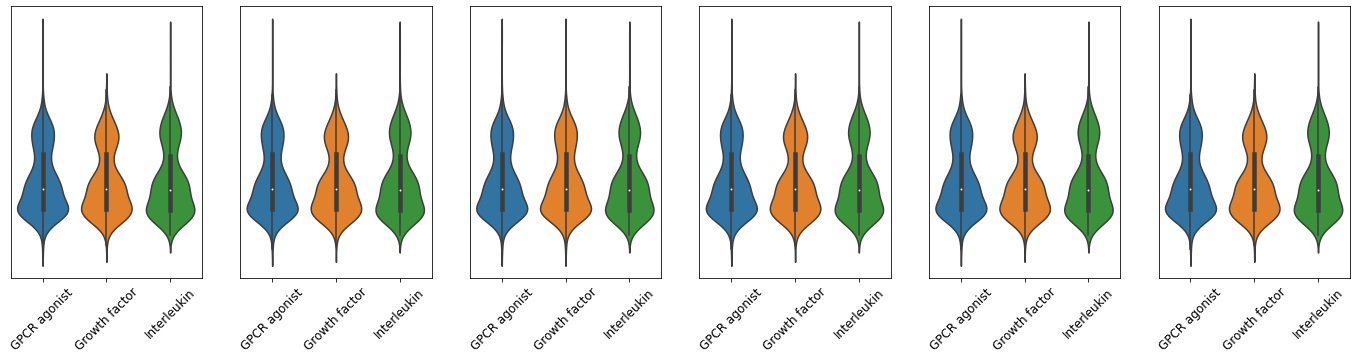

In [231]:
i = 0 

fig, axes = plt.subplots(1,6)

for channel_list in [channel_1_list, channel_2_list, channel_3_list, channel_4_list, channel_5_list, channel_6_list]:
    target_0 = np.sum(channel_list[0], axis = (1,2,3))
    target_1 = np.sum(channel_list[1], axis = (1,2,3))
    target_2 = np.sum(channel_list[2], axis = (1,2,3))

    sns.violinplot(ax = axes[i], data = [target_0, target_1, target_2])
    i += 1
    
for ax in axes:
    ax.set_xticklabels(['GPCR agonist', 'Growth factor', 'Interleukin'], rotation = 45, size = 12)
#     ax.xticks(rotation = 45)
    ax.set_yticks([])
    
fig.set_size_inches(24, 5)

# fig.tick_params(top=False, left=False, right=False,labelleft=False)
fig.savefig('/Users/emilylorenzen/GitStuff/metis-engineering/channel_comparison1-5.png', bbox_inches = 'tight')

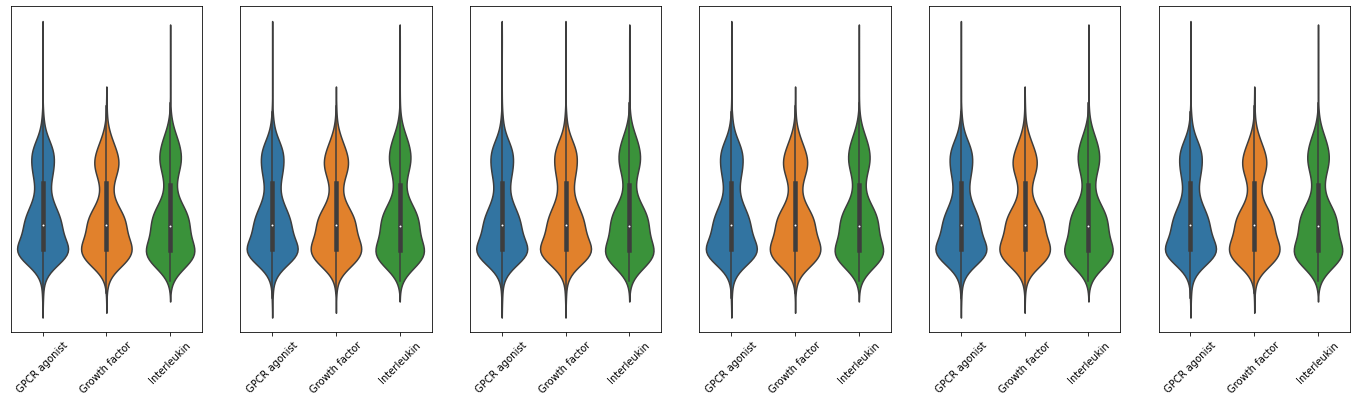

In [228]:
i = 0 

fig, axes = plt.subplots(1,6)

for channel_list in [channel_1_list, channel_2_list, channel_3_list, channel_4_list, channel_5_list, channel_6_list]:

    target_0 = np.mean(channel_list[0], axis = (1,2,3))
    target_1 = np.mean(channel_list[1], axis = (1,2,3))
    target_2 = np.mean(channel_list[2], axis = (1,2,3))

    sns.violinplot(ax = axes[i], data = [target_0, target_1, target_2])
#     ax[i].set_xticklabels(['GPCR agonist', 'Growth factor', 'Interleukin'])
    i += 1
                       
for ax in axes:
    ax.set_xticklabels(['GPCR agonist', 'Growth factor', 'Interleukin'], rotation = 45)
#     ax.xticks(rotation = 45)
    ax.set_yticks([])
    
fig.set_size_inches(24, 6)

# fig.tick_params(top=False, left=False, right=False,labelleft=False)
fig.savefig('/Users/emilylorenzen/GitStuff/metis-engineering/channel_comparison2-5.png', bbox_inches = 'tight')

In [ ]:
target_0 = np.sum(GPCR_1_array, axis = (1,2,3))
target_1 = np.sum(GF_1_array, axis = (1,2,3))
target_2 = np.sum(IL_1_array, axis = (1,2,3))
sns.violinplot(data = [target_0, target_1, target_2])

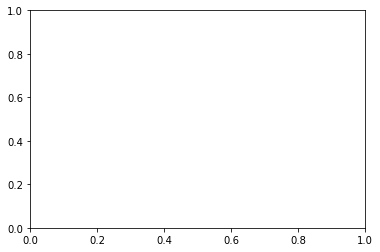

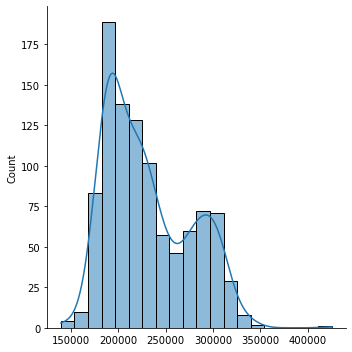

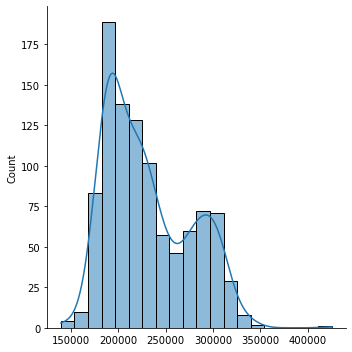

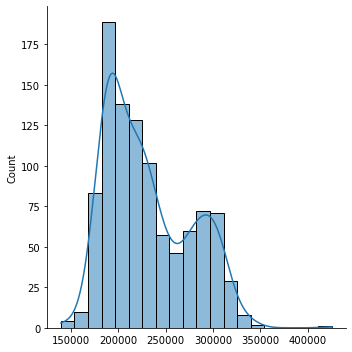

In [114]:
fig, ax = plt.subplots()
for a in channel_1_list:
#     print(a)
    sns.displot(np.sum(a, axis = (1,2,3)), kde = True)

In [ ]:
sns.histplot(np.sum(GPCR_1_array, axis = (1,2,3))